In [1]:
# Dependecies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import cpi

In [2]:
# Reading Analysis.csv
cleaned_csv = 'Analysis.csv'
cleaned_df = pd.read_csv(cleaned_csv)

In [3]:
#Formating Floats to Intergers
format_mapping= {'Gross_Income','Number of User Votes', 'Number of Critic Reviews' , 'Number of User Reviews',
                 'Facebook Likes (Director)', 'Facebook Likes (Actor 1)', 'Facebook Likes (Actor 2)', 'Budget',
                 'Facebook Likes (Actor 3)', 'Year', 'Duration (Minutes)', 'Number of Faces in Poster'}
for key in format_mapping:
    cleaned_df[key] = cleaned_df[key].astype(int)


In [4]:
# Creating New Columns for Budget and Gross_Income to be adjusted for Inflation
cleaned_df['Gross_Income_ADJ'] = cleaned_df.apply(lambda x: cpi.inflate(x.Gross_Income, x.Year), axis=1)
cleaned_df['Budget_ADJ'] = cleaned_df.apply(lambda x: cpi.inflate(x.Budget, x.Year), axis=1)

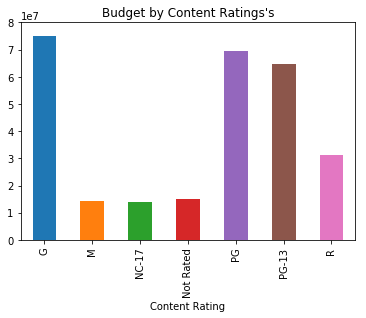

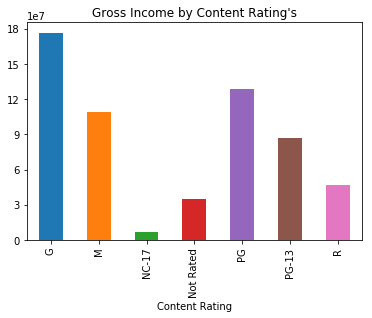

In [5]:
cleaned_df['Content Rating']= cleaned_df['Content Rating'].replace({'Approved': 'PG', 'Passed': 'PG', 'GP': 'PG', 'X': 'M',
                                                                     'Unrated': 'Not Rated'}) 
group_data = cleaned_df.groupby(['Content Rating']).agg({'Budget_ADJ': "mean" , "Gross_Income_ADJ": 'mean'})
group_data.plot(kind="bar",y="Budget_ADJ", legend=False, title= "Budget by Content Ratings's", 
                 yticks=[0,80000000, 70000000,60000000,50000000,40000000,30000000,20000000,10000000])
group_data.plot(kind="bar",y="Gross_Income_ADJ",  legend=False, title= "Gross Income by Content Rating's",
                 yticks=[0,180000000,150000000,120000000,90000000,60000000,30000000])

Text(0.5,0,'Genere')

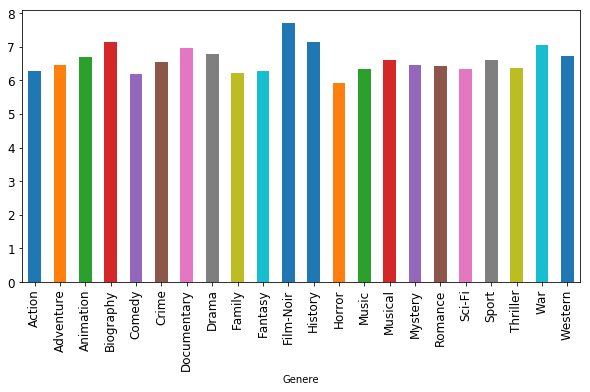

In [6]:
df = cleaned_df
df = df.dropna(subset=['Genere']).reset_index(drop=True) 
splitted = df['Genere'].str.split('|')  
l = splitted.str.len()
x = df['IMDB Score']
#is necessary define new column name (divided) and change `df[]` to `x`  
df = pd.DataFrame({'divided': np.repeat(x, l), 'Genere':np.concatenate(splitted)}) 
#define column for aggregate (divided), no x, because processing new df created by repeat 
d = {'mean':'Average Income'}
df1 = df.groupby('Genere')['divided'].mean().rename(columns=d)

df1.plot.bar(x='Genere', y='return' , fontsize= 12, figsize=(10,5)) 
plt.xlabel("Genere")  

Text(0.5,0,'Genere')

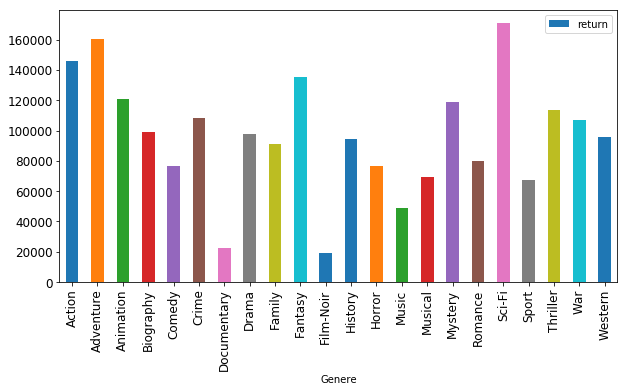

In [7]:
df = cleaned_df


df = df.dropna(subset=['Genere']).reset_index(drop=True) 

splitted = df['Genere'].str.split('|')  
l = splitted.str.len()

x = df['Number of User Votes']

#is necessary define new column name (divided) and change `df[]` to `x`  
df = pd.DataFrame({'divided': np.repeat(x, l), 'Genere':np.concatenate(splitted)}) 
#define column for aggregate (divided), no x, because processing new df created by repeat 
d = {'mean':'Average Income'}
df1 = df.groupby('Genere')['divided'].mean().rename(columns=d).reset_index(name='return')

df1.plot.bar(x='Genere', y='return' , fontsize= 12, figsize=(10,5)) 
plt.xlabel("Genere") 

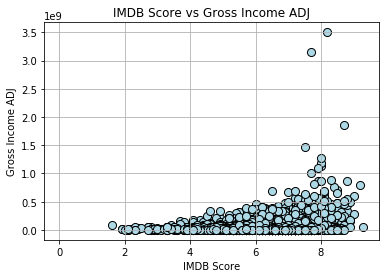

In [8]:
def set_plot_prop(x_title,y_title):
    plt.title(f"{x_title} vs {y_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    
    
cleaned_df.plot(kind="scatter",x="IMDB Score",y="Gross_Income_ADJ",grid=True,color="lightblue",edgecolors="black", s=65)
set_plot_prop("IMDB Score","Gross Income ADJ")
plt.axvline(0, color='black',alpha=0.01 )
#plt.savefig("Latitude vs Temperature")
plt.show()

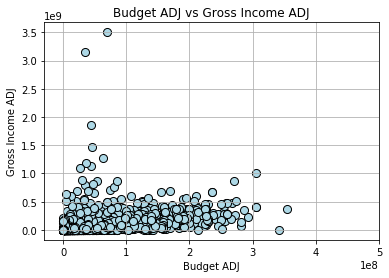

In [9]:
cleaned_df.plot(kind="scatter",x="Budget_ADJ",y="Gross_Income_ADJ",grid=True,color="lightblue",edgecolors="black", s=65,xlim=[-30000000,500000000])
set_plot_prop("Budget ADJ","Gross Income ADJ")
plt.axvline(0, color='black',alpha=0.01 )
#plt.savefig("Latitude vs Temperature")
plt.show()

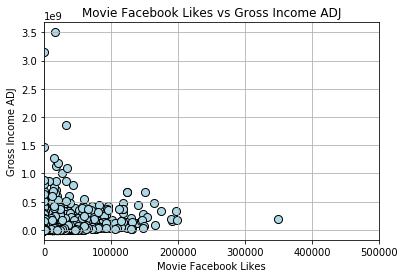

In [10]:
cleaned_df.plot(kind="scatter",x="Movie Facebook Likes",y="Gross_Income_ADJ",grid=True,color="lightblue",edgecolors="black", s=65,xlim=[0,500000])
set_plot_prop("Movie Facebook Likes","Gross Income ADJ")
plt.axvline(0, color='black',alpha=0.01 )
#plt.savefig("Latitude vs Temperature")
plt.show()

In [11]:
cr_cleaned_df = cleaned_df
bud_average = (round(cr_cleaned_df.groupby(['Content Rating'])['Budget_ADJ'].mean(),2))
rating = cr_cleaned_df.groupby(["Content Rating"])["IMDB Score"].mean()
#contentrat = cr_cleaned_df.groupby('Content Rating')

pcd = pd.DataFrame({"Average Budget": bud_average,
                   "IMDB Score": rating,})
                   #"Rating": contentrat })
pcd

,Average Budget,IMDB Score
Content Rating,,
G,74887689.02,6.502299
M,14262872.03,6.691667
NC-17,14087671.55,6.366667
Not Rated,15108848.86,6.963158
PG,69474937.87,6.334864
PG-13,64647246.64,6.270373
R,31123427.58,6.636454


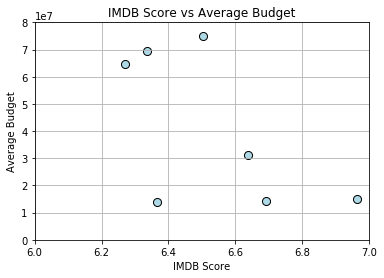

In [12]:
pcd.plot(kind="scatter",x="IMDB Score", y="Average Budget" ,grid=True,color="lightblue",edgecolors="black", s=65,xlim=[6,7],ylim=[0, 80000000])
set_plot_prop("IMDB Score","Average Budget")
plt.axvline(0, color='black',alpha=0.01 )
#plt.savefig("Latitude vs Temperature")
plt.show()

In [25]:
df = cleaned_df
df = df.dropna(subset=['Genere']).reset_index(drop=True) 
splitted = df['Genere'].str.split('|')  
l = splitted.str.len()
df = pd.DataFrame({'divided': np.repeat(x, l), 'Genere':np.concatenate(splitted)}) 
number_genere = df.groupby('Genere').count()
y = number_genere['divided']
x = number_genere.index()

TypeError: 'Index' object is not callable